<a href="https://colab.research.google.com/github/uptrain-ai/uptrain/blob/main/examples/checks/query_quality/multi_query_accuracy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align="center">
  <a href="https://uptrain.ai">
    <img width="300" src="https://user-images.githubusercontent.com/108270398/214240695-4f958b76-c993-4ddd-8de6-8668f4d0da84.png" alt="uptrain">
  </a>
</h1>


<h1 style="text-align: center;">Multi-Query Accuracy</h1>


**What is Multi-Query Accuracy?**: Multi-Query Accuracy evaluates how accurately the variations of the query represent the same question.


**Data schema**: The data schema required for this evaluation is as follows:

| Column Name | Description                     |
| ----------- | ------------------------------- |
| question    | The question asked by the user  |
| variants    | Variants generated from the question |

 If you face any difficulties, need some help with using UpTrain or want to brainstorm on custom evaluations for your use-case, [speak to the maintainers of UpTrain here](https://calendly.com/uptrain-sourabh/30min).

## Step 1: Install UpTrain by running 'pip install uptrain'

In [1]:
# !pip install uptrain

## Step 2: Let's define our dataset to run evaluations upon

In [2]:
data = [
    {
        'question': 'How does the stock market work?',
        'variants': '1. What is the stock market?\n 2. How does the stock market function?\n 3. What is the purpose of the stock market?'        
    },
    {
        'question': 'How does the stock market work?',
        'variants': '1. What is the stock market?'        
    }
]

## Step 3: Running evaluations using UpTrain's Open-Source Software (OSS)

In [3]:
from uptrain import EvalLLM, Evals
import json

OPENAI_API_KEY = "sk-*******************************"  # Insert your OpenAI key here

eval_llm = EvalLLM(openai_api_key=OPENAI_API_KEY)

res = eval_llm.evaluate(
    data = data,
    checks = [Evals.MULTI_QUERY_ACCURACY]
)

print(json.dumps(res,indent=3))

/Users/dhruvchawla/work/uptrain-v1/.venv/lib/python3.11/site-packages/lazy_loader/__init__.py:185: RuntimeWarning: subpackages can technically be lazily loaded, but it causes the package to be eagerly loaded even if it is already lazily loaded.So, you probably shouldn't use subpackages with this lazy feature.
  warnings.warn(msg, RuntimeWarning)
2024-04-04 14:45:59.148 | WARNING  | uptrain.operators.language.llm:fetch_responses:268 - Detected a running event loop, scheduling requests in a separate thread.
100%|██████████| 2/2 [00:01<00:00,  1.46it/s]
/Users/dhruvchawla/work/uptrain-v1/uptrain/operators/language/llm.py:271: RuntimeWarning: coroutine 'LLMMulticlient.async_fetch_responses' was never awaited
  with ThreadPoolExecutor(max_workers=1) as executor:
2024-04-04 14:46:00.575 | INFO     | uptrain.framework.evalllm:evaluate:365 - Local server not running, start the server to log data and visualize in the dashboard!


[
   {
      "question": "How does the stock market work?",
      "variants": "1. What is the stock market?\n 2. How does the stock market function?\n 3. What is the purpose of the stock market?",
      "score_multi_query_accuracy": 1.0,
      "explanation_multi_query_accuracy": "{\n    \"Reasoning\": \"The response provides accurate and relevant information about the functioning and purpose of the stock market, addressing the various aspects of the question across different queries. It covers the definition of the stock market, its functioning, and its purpose, demonstrating a comprehensive understanding of the topic.\",\n    \"Choice\": \"A\"\n}"
   },
   {
      "question": "How does the stock market work?",
      "variants": "1. What is the stock market?",
      "score_multi_query_accuracy": 0.0,
      "explanation_multi_query_accuracy": "{\n    \"Reasoning\": \"The given variation does not directly address the main causes of climate change, but rather focuses on defining the stock

## Step 4: Let's look at some of the results 

### Sample with Complete Variants

In [4]:
print(json.dumps(res[0],indent=3))

{
   "question": "How does the stock market work?",
   "variants": "1. What is the stock market?\n 2. How does the stock market function?\n 3. What is the purpose of the stock market?",
   "score_multi_query_accuracy": 1.0,
   "explanation_multi_query_accuracy": "{\n    \"Reasoning\": \"The response provides accurate and relevant information about the functioning and purpose of the stock market, addressing the various aspects of the question across different queries. It covers the definition of the stock market, its functioning, and its purpose, demonstrating a comprehensive understanding of the topic.\",\n    \"Choice\": \"A\"\n}"
}


### Sample with Incomplete Variants

In [5]:
print(json.dumps(res[1],indent=3))

{
   "question": "How does the stock market work?",
   "variants": "1. What is the stock market?",
   "score_multi_query_accuracy": 0.0,
   "explanation_multi_query_accuracy": "{\n    \"Reasoning\": \"The given variation does not directly address the main causes of climate change, but rather focuses on defining the stock market. It does not cover the aspects of how the stock market works, such as trading, investment, and market dynamics.\",\n    \"Choice\": \"C\"\n}"
}


## [Optional] Step 5: UpTrain Managed Service and Dashboards

You can create a free UpTrain account [here](https://uptrain.ai/) and get free trial credits. If you want more trial credits, [book a call with the maintainers of UpTrain here](https://calendly.com/uptrain-sourabh/30min).

UpTrain Managed service provides:
1. Dashboards with advanced drill-down and filtering options
2. Insights and common topics among failing cases
3. Observability and real-time monitoring of production data
4. Regression testing via seamless integration with your CI/CD pipelines

In [8]:
from uptrain import Evals, APIClient, Settings

UPTRAIN_API_KEY = "up-*************************"  # Insert your UpTrain API key here

uptrain_client = APIClient(
    Settings(
        uptrain_access_token=UPTRAIN_API_KEY, response_format={"type": "json_object"}
    )
)

res = uptrain_client.log_and_evaluate(
    "Demo-multi-query-accuracy", 
    data = data, 
    checks = [Evals.MULTI_QUERY_ACCURACY]
)

print(json.dumps(res, indent=3))

2024-04-04 14:47:23.284 | INFO     | uptrain.framework.remote:log_and_evaluate:672 - Sending evaluation request for rows 0 to <50 to the Uptrain server


[
   {
      "question": "How does the stock market work?",
      "variants": "1. What is the stock market?\n 2. How does the stock market function?\n 3. What is the purpose of the stock market?",
      "score_multi_query_accuracy": 0.5,
      "explanation_multi_query_accuracy": "Step by step reasoning:\n\n1. Original question: \"How does the stock market work?\"\n2. Variants:\n   a. \"What is the stock market?\"\n   b. \"How does the stock market function?\"\n   c. \"What is the purpose of the stock market?\"\n\nNow, let's analyze each variant:\n- Variant (a) \"What is the stock market?\": This question is closely related to the original question as it seeks to understand the nature or definition of the stock market. It is relevant to understanding how the stock market works.\n- Variant (b) \"How does the stock market function?\": This variant directly addresses the functioning of the stock market, which aligns with the original question about how the stock market works. It is essenti

### Dashboards: 
Histogram of score vs number of cases with that score

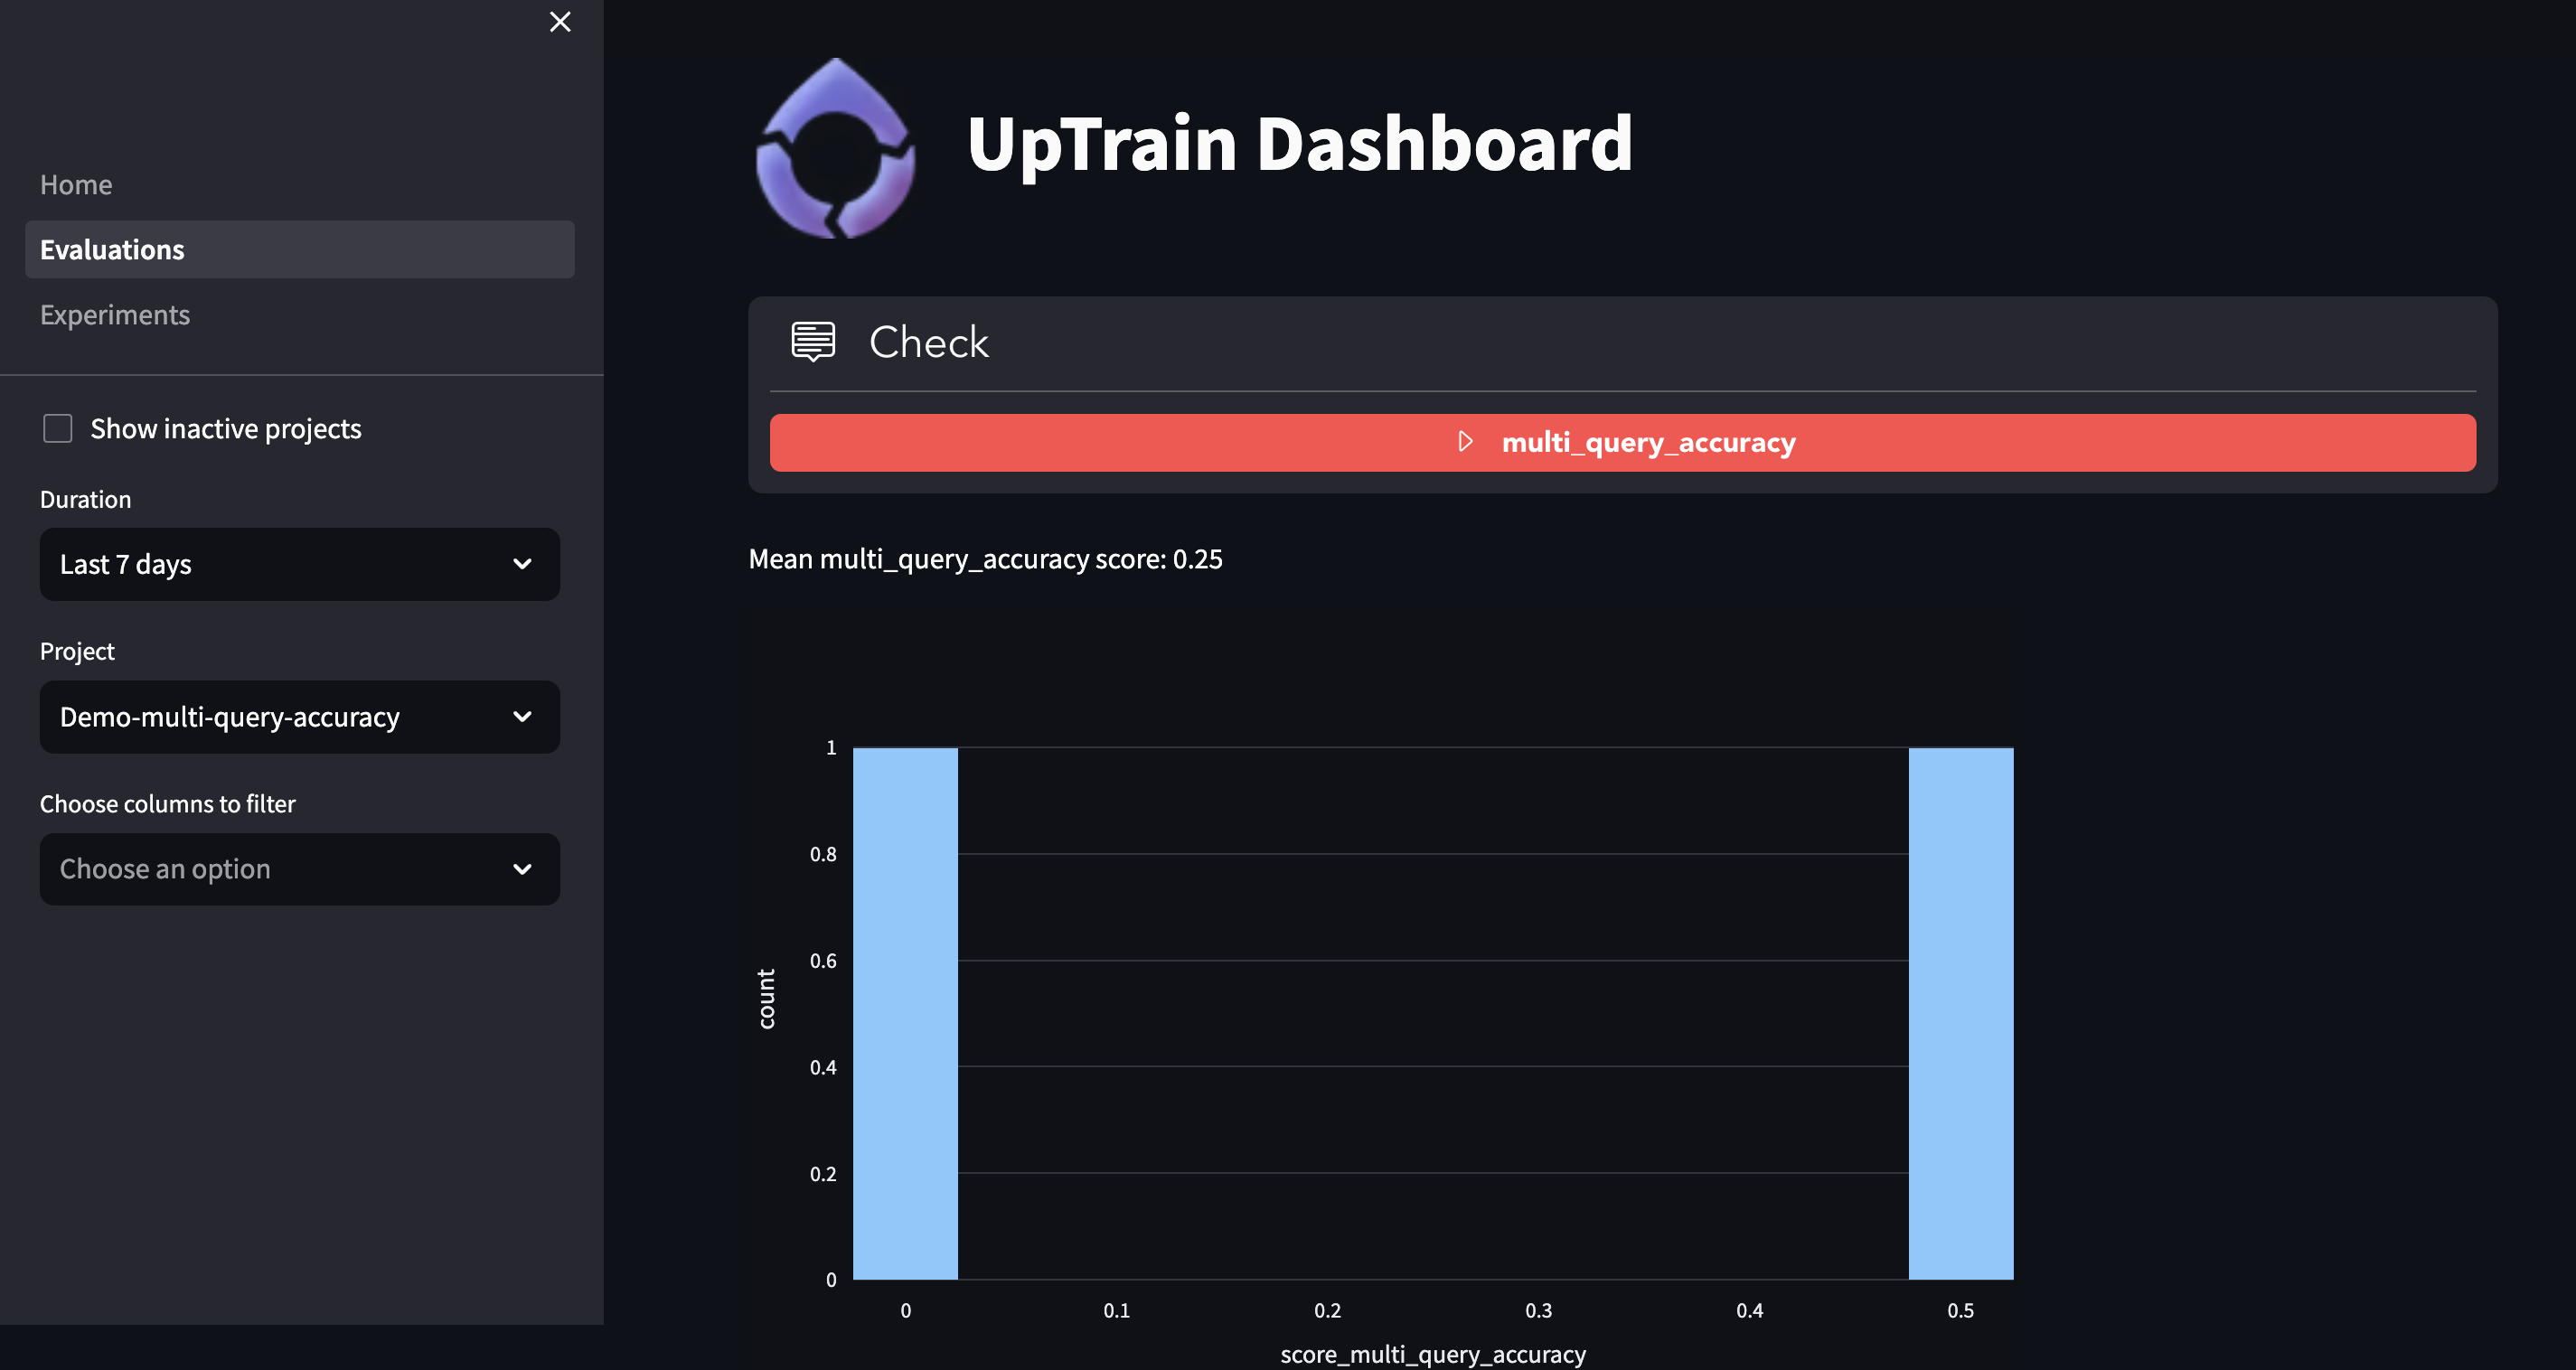
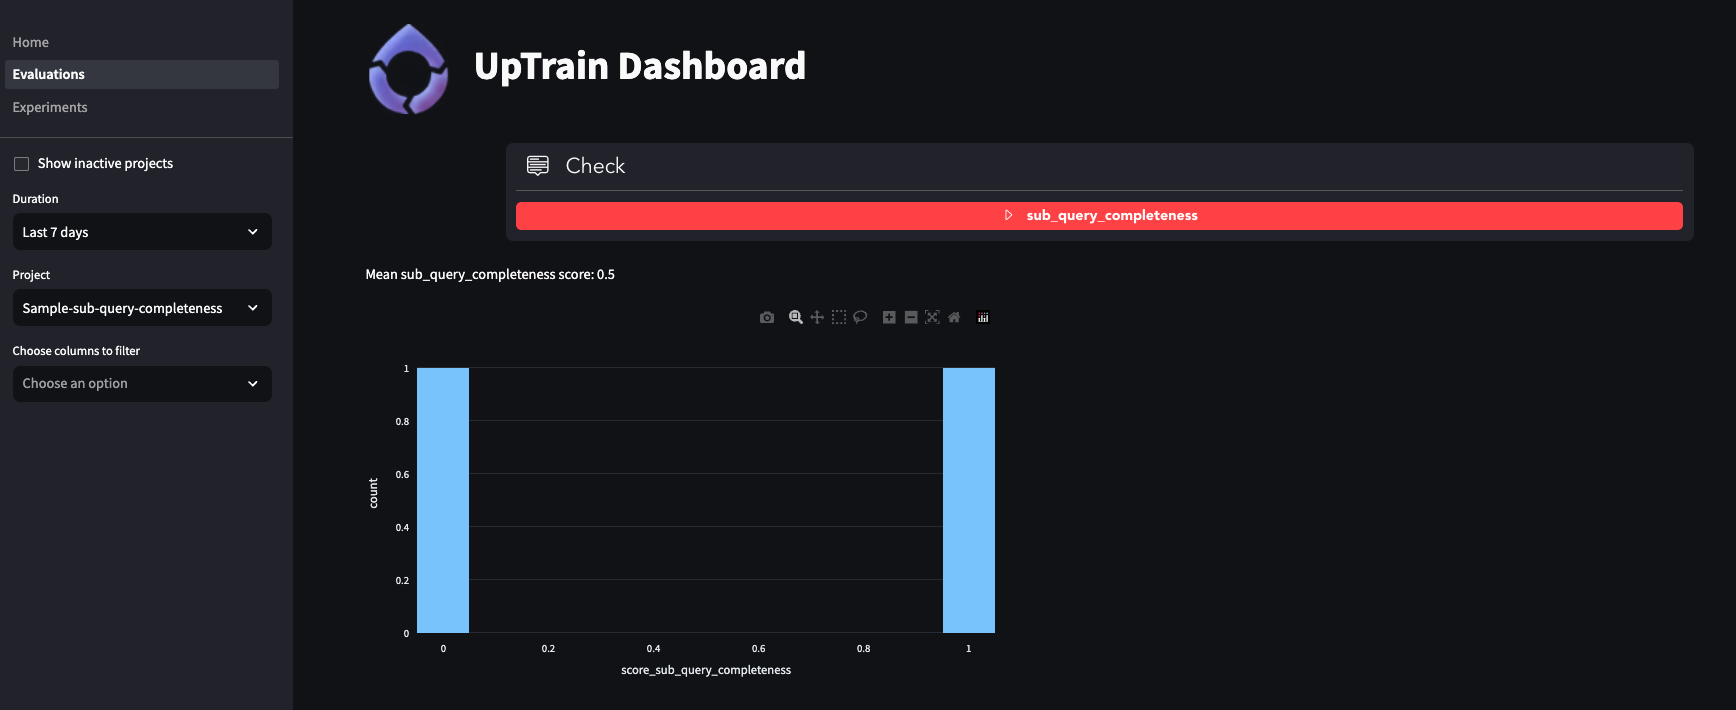

### Insights:
You can filter failure cases and generate common topics among them. This can help identify the core issue and help fix it

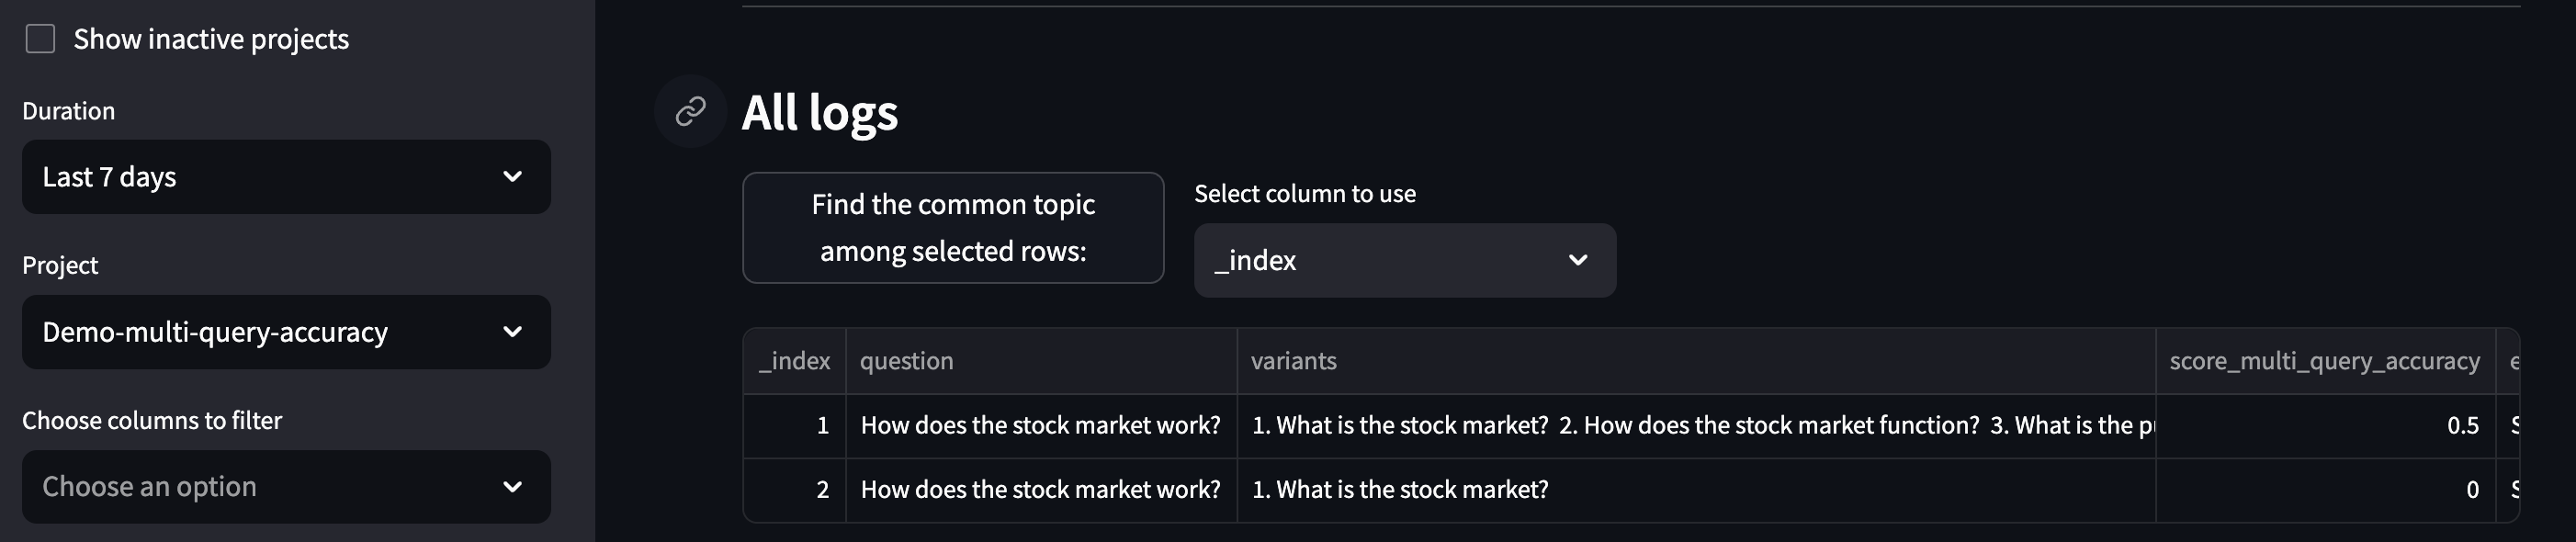
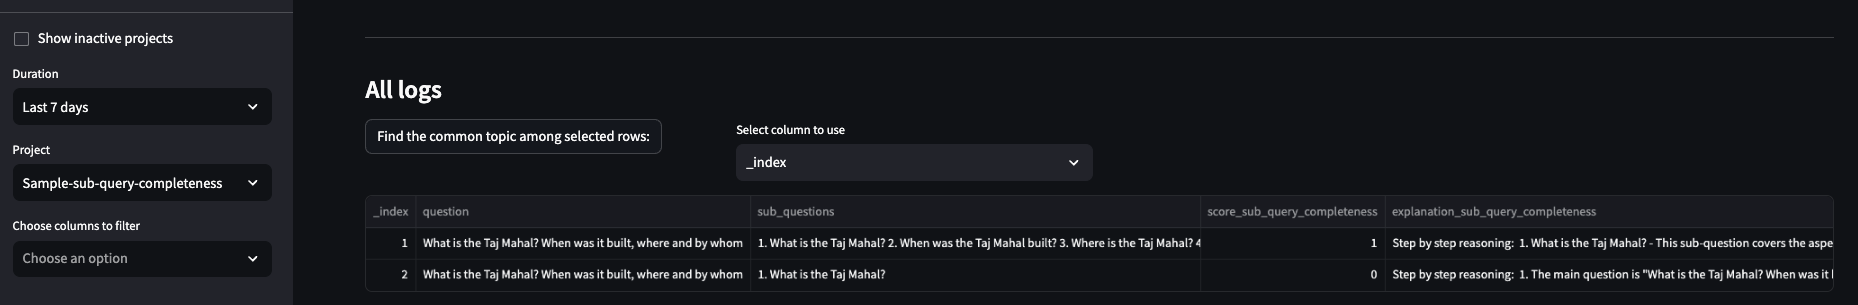